In [1]:
# Dependencies

import pandas as pd
import numpy as np
from config import fred_key
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st





## Interest Rate Data Frame

In [2]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

int_rate_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]

# Change column header on value column
int_rate_df.columns.values[1] = "Interest Rate"

# write a CSV
int_rate_df.to_csv("output_data/int_rate.csv")

# Change the data types 
int_rate_df['date'] = int_rate_df['date'].apply(pd.to_datetime)
int_rate_df = int_rate_df.astype({"Interest Rate": float})

# print the dataframe
int_rate_df



,date,Interest Rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


In [3]:
int_rate_df['date2'] = int_rate_df.loc[:, 'date']
int_rate_df

,date,Interest Rate,date2
0,1954-07-01,0.80,1954-07-01
1,1954-08-01,1.22,1954-08-01
2,1954-09-01,1.07,1954-09-01
3,1954-10-01,0.85,1954-10-01
4,1954-11-01,0.83,1954-11-01
...,...,...,...
818,2022-09-01,2.56,2022-09-01
819,2022-10-01,3.08,2022-10-01
820,2022-11-01,3.78,2022-11-01
821,2022-12-01,4.10,2022-12-01


## Unemployment Rate Data Frame

In [4]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'UNRATE'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

unemp_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
unemp_df = unemp_df[["date", "value"]]

# Change column header on value column
unemp_df.columns.values[1] = "Unemployment Rate"

# write a CSV
unemp_df.to_csv("output_data/unemp.csv")

# Change the data types 
unemp_df['date'] = unemp_df['date'].apply(pd.to_datetime)
unemp_df = unemp_df.astype({"Unemployment Rate": float})

unemp_df





,date,Unemployment Rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
896,2022-09-01,3.5
897,2022-10-01,3.7
898,2022-11-01,3.6
899,2022-12-01,3.5


## GDP Data Frame

In [5]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'GDP'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

gdp_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
gdp_df = gdp_df[["date", "value"]]

# Change column header on value column
gdp_df.columns.values[1] = "GDP"

#___________________________________________________________
# Remove null values (values labeled as '.')
gdp_df = gdp_df.loc[gdp_df["GDP"] != '.']
#___________________________________________________________

# Change the data types 
gdp_df['date'] = gdp_df['date'].apply(pd.to_datetime)
gdp_df = gdp_df.astype({"GDP": float})


# write a CSV
gdp_df.to_csv("output_data/gdp_rate.csv")
gdp_df




,date,GDP
4,1947-01-01,243.164
5,1947-04-01,245.968
6,1947-07-01,249.585
7,1947-10-01,259.745
8,1948-01-01,265.742
...,...,...
303,2021-10-01,24349.121
304,2022-01-01,24740.480
305,2022-04-01,25248.476
306,2022-07-01,25723.941


## Real Personal Income Dataframe

In [6]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'RPI'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

rpi_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
rpi_df = rpi_df[["date", "value"]]

# Change column header on value column
rpi_df.columns.values[1] = "Real Personal Income"

# write a CSV
rpi_df.to_csv("output_data/rpi.csv")

# Change the data types 
rpi_df['date'] = rpi_df['date'].apply(pd.to_datetime)
rpi_df = rpi_df.astype({"Real Personal Income": float})

rpi_df


,date,Real Personal Income
0,1959-01-01,2442.158
1,1959-02-01,2451.778
2,1959-03-01,2467.594
3,1959-04-01,2483.671
4,1959-05-01,2498.026
...,...,...
763,2022-08-01,17667.669
764,2022-09-01,17673.729
765,2022-10-01,17748.128
766,2022-11-01,17776.251


## Industrial Production Dataframe

In [7]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'INDPRO'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

indpro_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
indpro_df = indpro_df[["date", "value"]]

# Change column header on value column
indpro_df.columns.values[1] = "Industrial Production Index"

# Change the data types 
indpro_df['date'] = indpro_df['date'].apply(pd.to_datetime)
indpro_df = indpro_df.astype({"Industrial Production Index": float})


# write a CSV
indpro_df.to_csv("output_data/indpro.csv")
indpro_df


,date,Industrial Production Index
0,1919-01-01,4.8773
1,1919-02-01,4.6617
2,1919-03-01,4.5270
3,1919-04-01,4.6078
4,1919-05-01,4.6348
...,...,...
1243,2022-08-01,104.4696
1244,2022-09-01,104.8292
1245,2022-10-01,104.7972
1246,2022-11-01,104.1863


## Real Personal Consumption

In [8]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'PCEC96'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

rpc_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
rpc_df = rpc_df[["date", "value"]]

# Change column header on value column
rpc_df.columns.values[1] = "Real Personal Consumption"

#___________________________________________________________
# Remove null values (values labeled as '.')
rpc_df = rpc_df.loc[rpc_df["Real Personal Consumption"] != '.']
#___________________________________________________________


# Change the data types 
rpc_df['date'] = rpc_df['date'].apply(pd.to_datetime)
rpc_df = rpc_df.astype({"Real Personal Consumption": float})


# write a CSV
rpc_df.to_csv("output_data/rpc.csv")
rpc_df

,date,Real Personal Consumption
516,2002-01-01,9004.4
517,2002-02-01,9040.1
518,2002-03-01,9038.2
519,2002-04-01,9086.5
520,2002-05-01,9051.4
...,...,...
763,2022-08-01,14188.9
764,2022-09-01,14225.6
765,2022-10-01,14285.3
766,2022-11-01,14256.0


## Women Employment Level Dataframe

In [9]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'LNS12000002'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

wel_df = pd.DataFrame(fred_response["observations"])

wel_df.drop(wel_df.columns[[0, 1]], axis=1, inplace=True)

# Change column header on value column
wel_df.columns.values[1] = "Women Employment Level"

# Change the data types 
wel_df['date'] = wel_df['date'].apply(pd.to_datetime)
wel_df = wel_df.astype({"Women Employment Level": float})


# write a CSV
wel_df.to_csv("output_data/wel.csv")
wel_df


,date,Women Employment Level
0,1948-01-01,16325.0
1,1948-02-01,16361.0
2,1948-03-01,16240.0
3,1948-04-01,16706.0
4,1948-05-01,16344.0
...,...,...
896,2022-09-01,74318.0
897,2022-10-01,74033.0
898,2022-11-01,73970.0
899,2022-12-01,74364.0


## Total Nonfarm workers

In [10]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'PAYEMS'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

tnw_df = pd.DataFrame(fred_response["observations"])

tnw_df.drop(tnw_df.columns[[0, 1]], axis=1, inplace=True)

# Change column header on value column
tnw_df.columns.values[1] = "Total Nonfarm Workers"

# Change the data types 
tnw_df['date'] = tnw_df['date'].apply(pd.to_datetime)
tnw_df = tnw_df.astype({"Total Nonfarm Workers": float})


# # write a CSV
tnw_df.to_csv("output_data/tnw.csv")
tnw_df


,date,Total Nonfarm Workers
0,1939-01-01,29923.0
1,1939-02-01,30100.0
2,1939-03-01,30280.0
3,1939-04-01,30094.0
4,1939-05-01,30299.0
...,...,...
1004,2022-09-01,153682.0
1005,2022-10-01,154006.0
1006,2022-11-01,154296.0
1007,2022-12-01,154556.0


## Retail Sales Dataframe

In [11]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'MRTSSM44X72USS'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

rs_df = pd.DataFrame(fred_response["observations"])

rs_df.drop(rs_df.columns[[0, 1]], axis=1, inplace=True)

# Change column header on value column
rs_df.columns.values[1] = "Retail Sales"

# Change the data types 
rs_df['date'] = rs_df['date'].apply(pd.to_datetime)
rs_df = rs_df.astype({"Retail Sales": float})


# # write a CSV
rs_df.to_csv("output_data/rs.csv")
rs_df

,date,Retail Sales
0,1992-01-01,164095.0
1,1992-02-01,164213.0
2,1992-03-01,163721.0
3,1992-04-01,164709.0
4,1992-05-01,165612.0
...,...,...
366,2022-07-01,681108.0
367,2022-08-01,685685.0
368,2022-09-01,684538.0
369,2022-10-01,691844.0


## Manufacturing Dataframe

In [12]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'MANEMP'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

manf_df = pd.DataFrame(fred_response["observations"])

manf_df.drop(manf_df.columns[[0, 1]], axis=1, inplace=True)

# Change column header on value column
manf_df.columns.values[1] = "Manufacturing"

# Change the data types 
manf_df['date'] = manf_df['date'].apply(pd.to_datetime)
manf_df = manf_df.astype({"Manufacturing": float})


# # write a CSV
manf_df.to_csv("output_data/manf.csv")
manf_df

,date,Manufacturing
0,1939-01-01,9077.0
1,1939-02-01,9175.0
2,1939-03-01,9275.0
3,1939-04-01,9309.0
4,1939-05-01,9299.0
...,...,...
1004,2022-09-01,12917.0
1005,2022-10-01,12954.0
1006,2022-11-01,12968.0
1007,2022-12-01,12980.0


## All merged dataframes with GDP

In [13]:
# Merging dataframes with GDP (int_rate_df, unemp_df, rpc_df, rpi_df, indpro_df, wel_df, tnw_df, rs_df, manf_df)

merged_gdp_int_rate_df = pd.merge(gdp_df, int_rate_df, on='date')
merged_gdp_unemp_df = pd.merge(gdp_df, unemp_df, on='date')
merged_gdp_rpc_df = pd.merge(gdp_df, rpc_df, on='date')
merged_gdp_rpi_df = pd.merge(gdp_df, rpi_df, on='date')
merged_gdp_indpro_df = pd.merge(gdp_df, indpro_df, on='date')
merged_gdp_wel_df = pd.merge(gdp_df, wel_df, on='date')
merged_gdp_tnw_df = pd.merge(gdp_df, tnw_df, on='date')
merged_gdp_rs_df = pd.merge(gdp_df, rs_df, on='date')
merged_gdp_manf_df = pd.merge(gdp_df, manf_df, on='date')



## GDP vs Interest Rate - Linear Regression 

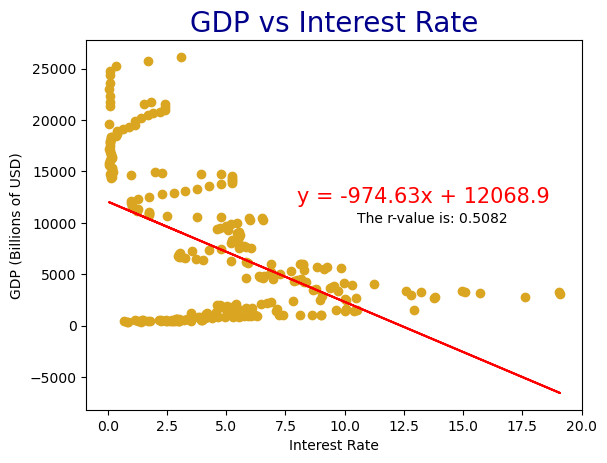

In [14]:
# Linear regression on GDP vs Interest Rate
int_rate = merged_gdp_int_rate_df['Interest Rate']
gdp = merged_gdp_int_rate_df['GDP']
x_values = int_rate
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,12000),fontsize=15,color="red")
plt.xlabel('Interest Rate')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10.5,10000,text)
plt.title(label="GDP vs Interest Rate",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_int_rate_plot.svg')


plt.show()

# assign variable to r value for this plot
r_val_gdp_int_rate = abs(round(st.pearsonr(x_values,y_values)[0],4))

## GDP vs Unemployment Rate - Linear Regression 

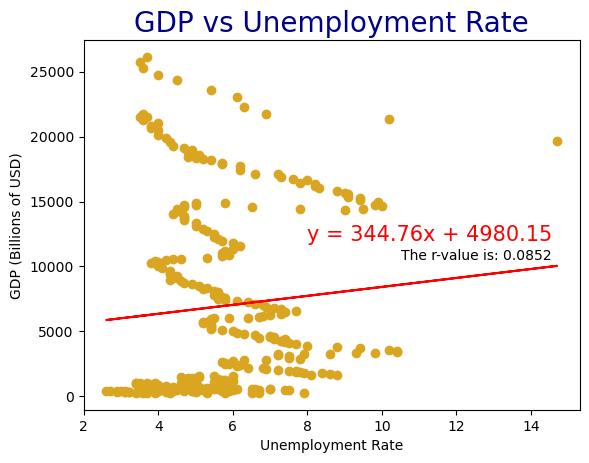

In [15]:
# Linear regression on GDP vs Unemployment Rate
unemp_rate = merged_gdp_unemp_df['Unemployment Rate']
gdp = merged_gdp_unemp_df['GDP']
x_values = unemp_rate
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,12000),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10.5,10500,text)
plt.title(label="GDP vs Unemployment Rate",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_unemp_plot.svg')


plt.show()

# assign variable to r value for this plot
r_val_gdp_unemp = abs(round(st.pearsonr(x_values,y_values)[0],4))

## GDP vs Real Personal Consumption - Linear Regression 

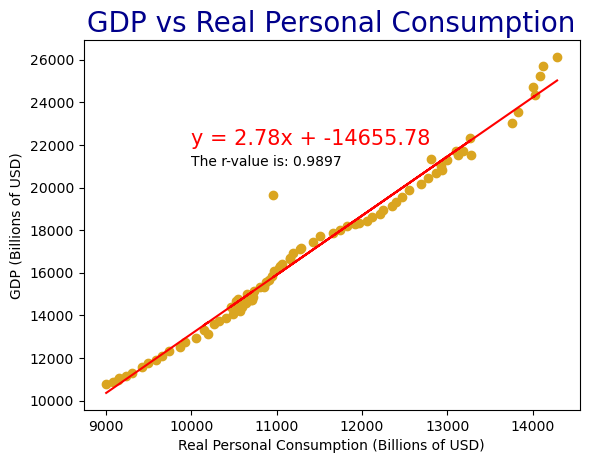

In [16]:
# Linear regression on GDP vs Real Personal Consumption
rpc = merged_gdp_rpc_df['Real Personal Consumption']
gdp = merged_gdp_rpc_df['GDP']
x_values = rpc
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10000,22000),fontsize=15,color="red")
plt.xlabel('Real Personal Consumption (Billions of USD)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10000,21000,text)
plt.title(label="GDP vs Real Personal Consumption",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_rpc_plot.svg')


plt.show()

# assign variable to r value for this plot
r_val_gdp_rpc = abs(round(st.pearsonr(x_values,y_values)[0],4))

## GDP vs Women Employment Level - Linear Regression 

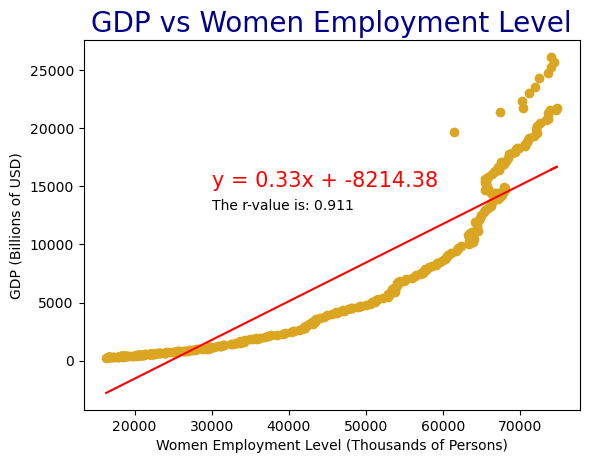

In [17]:
# Linear regression on GDP vs Real Personal Consumption
wel = merged_gdp_wel_df['Women Employment Level']
gdp = merged_gdp_wel_df['GDP']
x_values = wel
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30000,15000),fontsize=15,color="red")
plt.xlabel('Women Employment Level (Thousands of Persons)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(30000,13000,text)
plt.title(label="GDP vs Women Employment Level",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_wel_plot.svg')


plt.show()

r_val_gdp_wel = abs(round(st.pearsonr(x_values,y_values)[0],4))

## GDP vs Real Personal Income - Linear Regression 

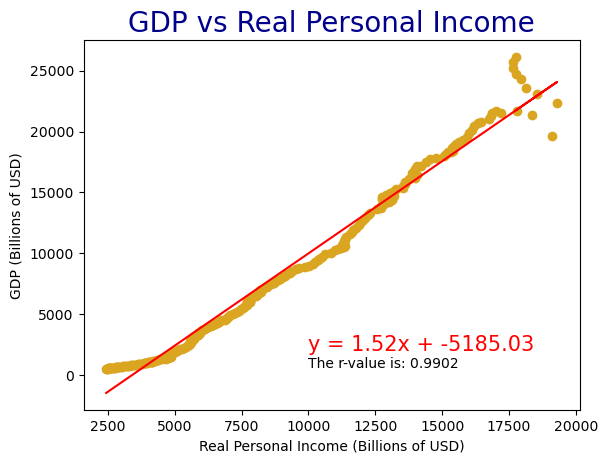

In [18]:
# Linear regression on GDP vs Real Personal Consumption
rpi = merged_gdp_rpi_df['Real Personal Income']
gdp = merged_gdp_rpi_df['GDP']
x_values = rpi
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10000,2000),fontsize=15,color="red")
plt.xlabel('Real Personal Income (Billions of USD)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10000,600,text)
plt.title(label="GDP vs Real Personal Income",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_rpi_plot.svg')


plt.show()

r_val_gdp_rpi = abs(round(st.pearsonr(x_values,y_values)[0],4))

## GDP vs Industrial Production - Linear Regression 

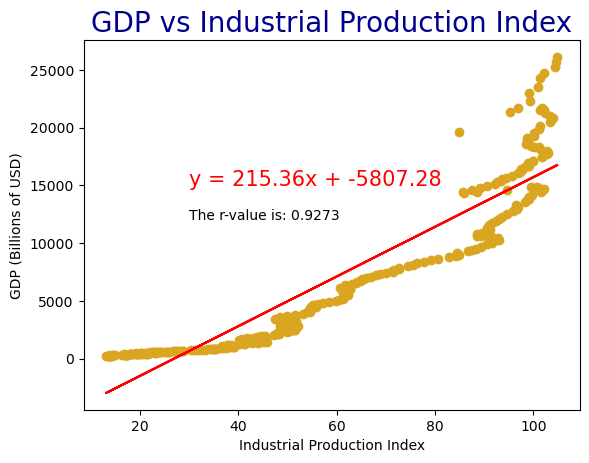

In [19]:
# Linear regression on GDP vs Industrial Production
indpro = merged_gdp_indpro_df['Industrial Production Index']
gdp = merged_gdp_indpro_df['GDP']
x_values = indpro
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,15000),fontsize=15,color="red")
plt.xlabel('Industrial Production Index')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(30,12000,text)
plt.title(label="GDP vs Industrial Production Index",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_indpro_plot.svg')


plt.show()

r_val_gdp_indpro = abs(round(st.pearsonr(x_values,y_values)[0],4))

## GDP vs Total Nonfarm Workers - Linear Regression 

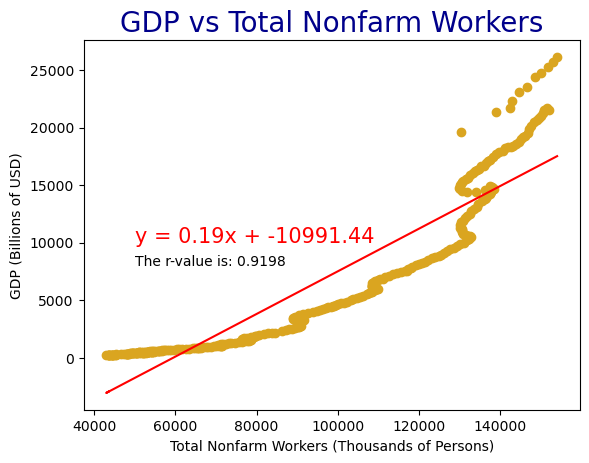

In [20]:
# Linear regression on GDP vs Total Nonfarm Workers
tnw = merged_gdp_tnw_df['Total Nonfarm Workers']
gdp = merged_gdp_tnw_df['GDP']
x_values = tnw
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Total Nonfarm Workers (Thousands of Persons)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(50000,8000,text)
plt.title(label="GDP vs Total Nonfarm Workers",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_tnw_plot.svg')


plt.show()

r_val_gdp_tnw = abs(round(st.pearsonr(x_values,y_values)[0],4))

## GDP vs Retail Sales - Linear Regression 

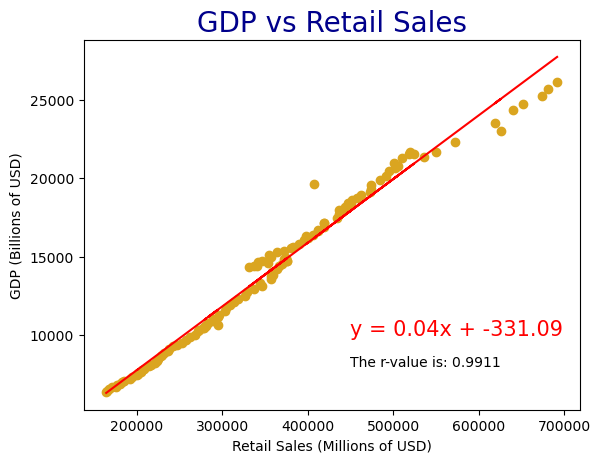

In [21]:
# Linear regression on GDP vs Retail Sales
rs = merged_gdp_rs_df['Retail Sales']
gdp = merged_gdp_rs_df['GDP']
x_values = rs
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(450000,10000),fontsize=15,color="red")
plt.xlabel('Retail Sales (Millions of USD)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(450000,8000,text)
plt.title(label="GDP vs Retail Sales",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_rs_plot.svg')


plt.show()

r_val_gdp_rs = abs(round(st.pearsonr(x_values,y_values)[0],4))

## GDP vs Manufacturing - Linear Regression 

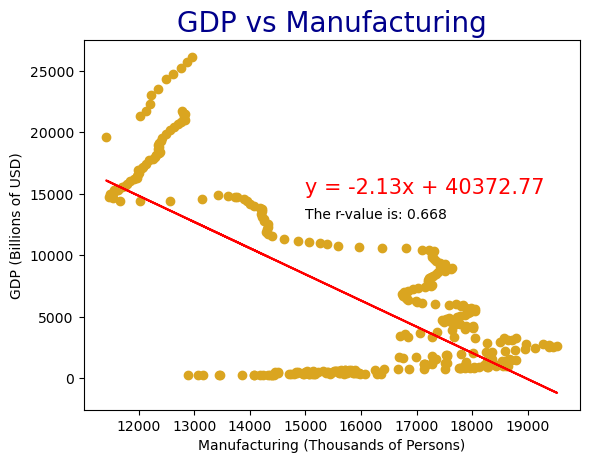

In [22]:
# Linear regression on GDP vs Manufacturing
manf = merged_gdp_manf_df['Manufacturing']
gdp = merged_gdp_manf_df['GDP']
x_values = manf
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,15000),fontsize=15,color="red")
plt.xlabel('Manufacturing (Thousands of Persons)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(15000,13000,text)
plt.title(label="GDP vs Manufacturing",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_manf_plot.svg')


# plt.show()
r_val_gdp_manf = abs(round(st.pearsonr(x_values,y_values)[0],4))

## R Value Dataframe

In [23]:
relation = ['GDP vs Interest Rate', 'GDP vs Unemployment Rate', 'GDP vs Real Personal Consumption',
            'GDP vs Real Personal Income', 'GDP vs Industrial Production', 'GDP vs Women Employment Level',
            'GDP vs Total Nonfarm Workers', 'GDP vs Retail Sales', 'GDP vs Manufacturing']
  
r_value = [r_val_gdp_int_rate, r_val_gdp_unemp, r_val_gdp_rpc, r_val_gdp_rpi, r_val_gdp_indpro,
           r_val_gdp_wel, r_val_gdp_tnw, r_val_gdp_rs, r_val_gdp_manf]
  
# Merge using Zip
r_value_list = list(zip(relation, r_value))
  
# Create the DataFrame
r_value_dfs = pd.DataFrame(r_value_list, columns=['Relation', 'R Values'])

# Sort the DataFrame from Highest to Lowest
r_values_sort_dfs = r_value_dfs.sort_values(by=['R Values'], ascending=False)
r_values_sort_dfs



,Relation,R Values
7,GDP vs Retail Sales,0.9911
3,GDP vs Real Personal Income,0.9902
2,GDP vs Real Personal Consumption,0.9897
4,GDP vs Industrial Production,0.9273
6,GDP vs Total Nonfarm Workers,0.9198
5,GDP vs Women Employment Level,0.9110
8,GDP vs Manufacturing,0.6680
0,GDP vs Interest Rate,0.5082
1,GDP vs Unemployment Rate,0.0852


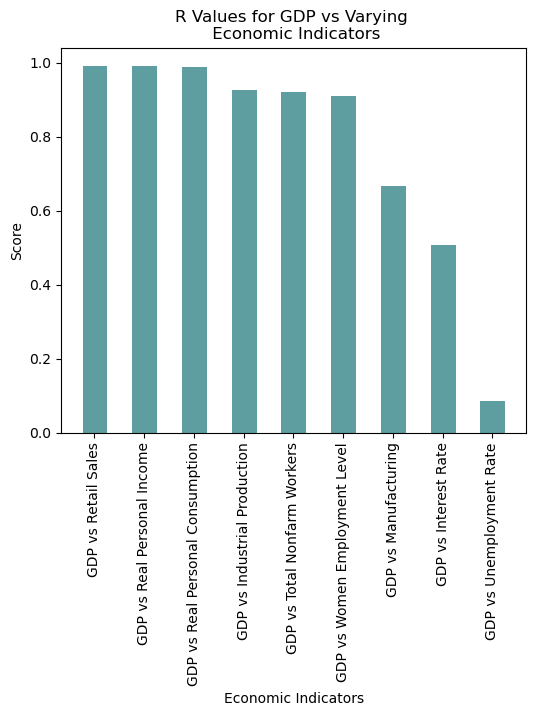

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(r_values_sort_dfs))
tick_locations = [value-.01 for value in x_axis]
plt.figure(figsize= (6,5))
plt.bar(x_axis, r_values_sort_dfs["R Values"], color='cadetblue', width = 0.5, align = 'center')
plt.xticks(tick_locations, r_values_sort_dfs["Relation"], rotation="90")
plt.title("R Values for GDP vs Varying \n Economic Indicators")
plt.xlabel("Economic Indicators")
plt.ylabel("Score")

# save the figure as an .svg 
plt.savefig('rvalues_plot.svg')


plt.show()

## GDP, RPI, and Interest Rate DataFrame

In [25]:
merged_gdp_rpi_int_rate_df = pd.merge(pd.merge(int_rate_df, gdp_df, on='date'), rpi_df , on='date')
merged_gdp_rpi_int_rate_df

,date,Interest Rate,date2,GDP,Real Personal Income
0,1959-01-01,2.48,1959-01-01,510.330,2442.158
1,1959-04-01,2.96,1959-04-01,522.653,2483.671
2,1959-07-01,3.47,1959-07-01,525.034,2504.312
3,1959-10-01,3.98,1959-10-01,528.600,2495.225
4,1960-01-01,3.99,1960-01-01,542.648,2548.137
...,...,...,...,...,...
251,2021-10-01,0.08,2021-10-01,24349.121,17937.674
252,2022-01-01,0.08,2022-01-01,24740.480,17749.994
253,2022-04-01,0.33,2022-04-01,25248.476,17664.987
254,2022-07-01,1.68,2022-07-01,25723.941,17651.739


## Create Three Charts on Single Plot

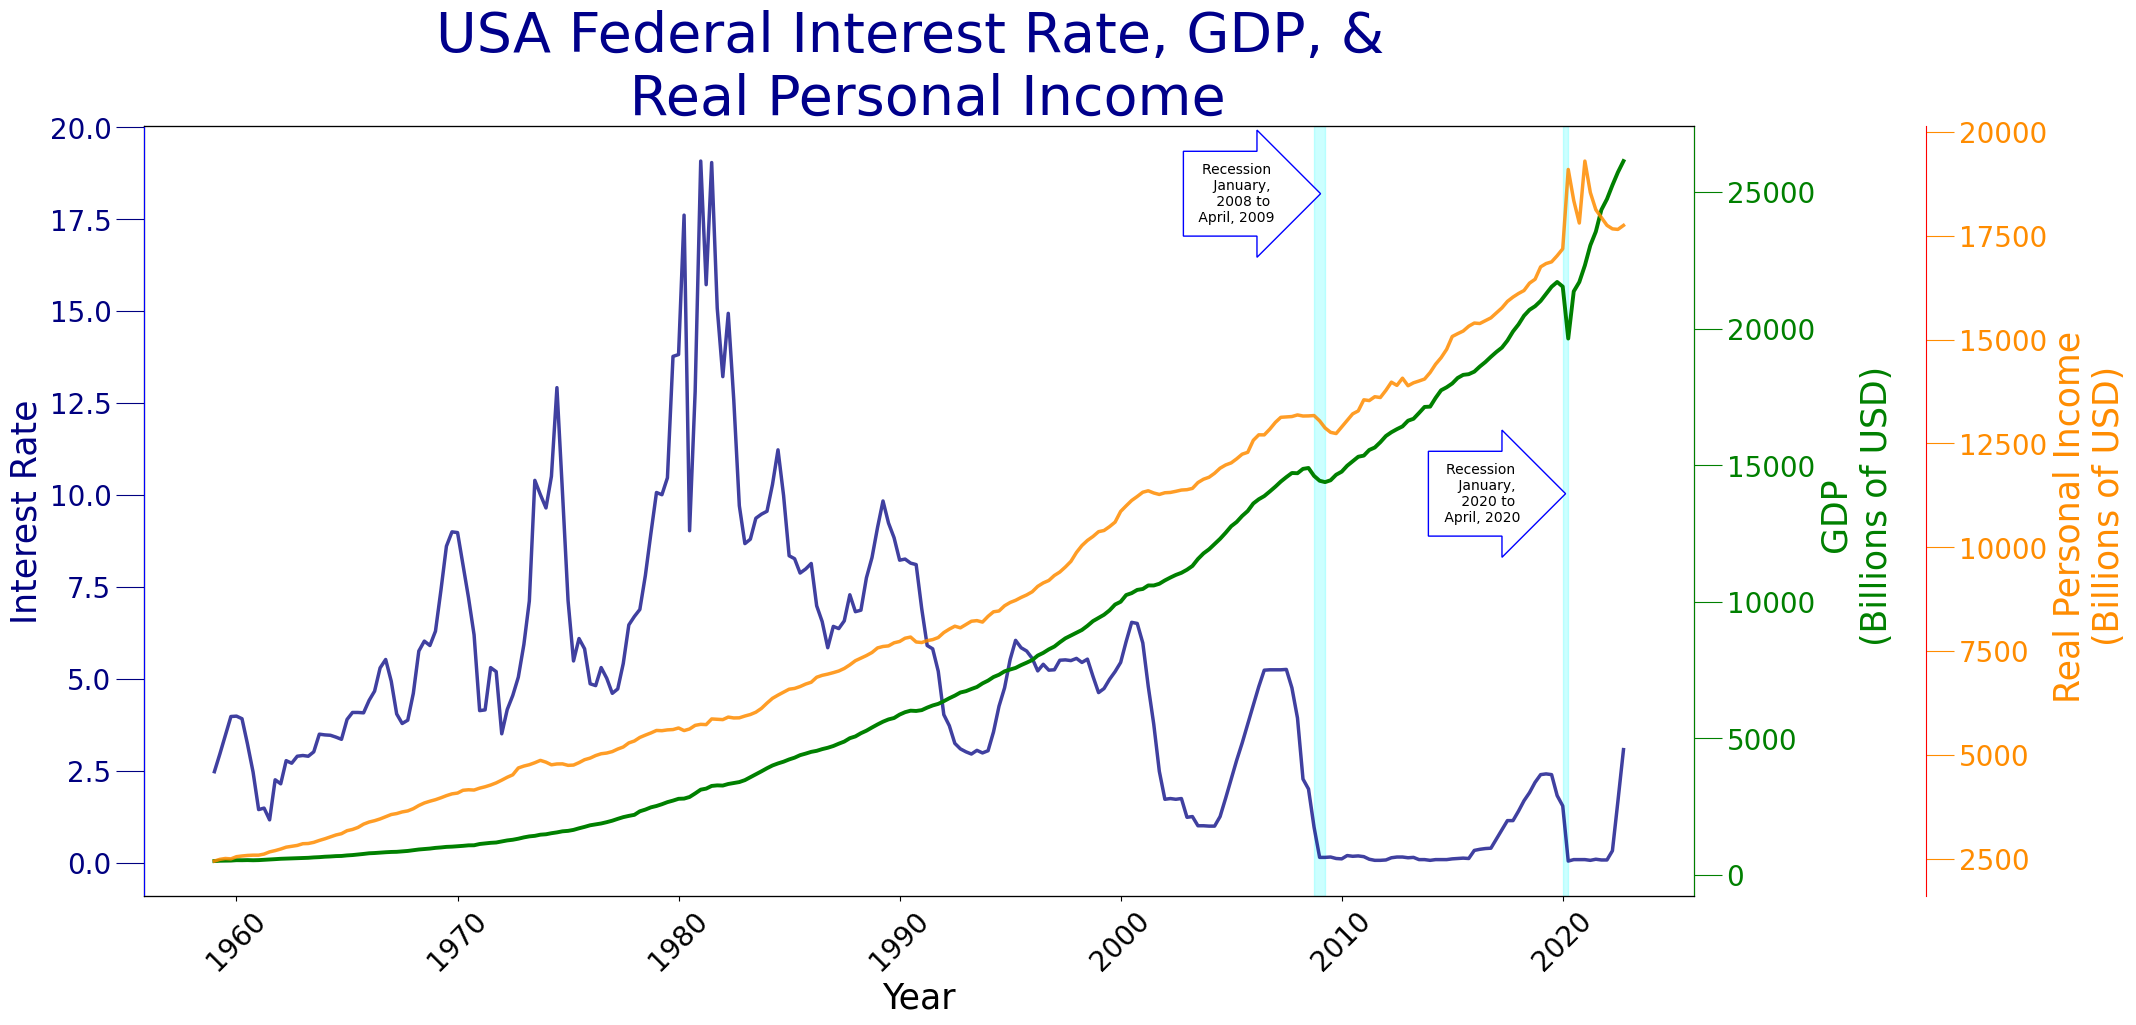

In [26]:
# Set code to default the size of chart, this code defaults for all charts run after this code!!!
plt.rcParams["figure.figsize"] = (20,10)

# Set parameters for subplots
fig, ax1 = plt.subplots()

# Set title of Plot
plt.title(label="USA Federal Interest Rate, GDP, & \n Real Personal Income",
          fontsize=40,
          color="darkblue")

# Define where the data comes from
x_axis = merged_gdp_rpi_int_rate_df['date']
int_rate_chart = merged_gdp_rpi_int_rate_df['Interest Rate']
gdp_chart = merged_gdp_rpi_int_rate_df['GDP']
rpi_chart = merged_gdp_rpi_int_rate_df['Real Personal Income']

# Define plot for interest rate
ax1.plot(x_axis, int_rate_chart, linewidth=2.5, alpha=0.75, color="navy")
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', color="black", labelsize=20, rotation = 45)


# Define plot for GDP
ax2 = ax1.twinx()
ax2.plot(x_axis, gdp_chart, linewidth=2.8, alpha=1, color="green", linestyle='-')
ax2.tick_params(axis='y', labelsize=20)

# Define plot for unemployment rate
ax3 = ax1.twinx()
ax3.plot(x_axis, rpi_chart, linewidth=2.5, alpha=.85, color="darkorange")
ax3.spines['right'].set_position(('axes',1.15))
ax3.tick_params(axis='y', labelsize=20)


# Set the labels for both axes
ax1.set_xlabel("Year", color="black", size=25)
ax1.set_ylabel("Interest Rate", color="navy", size=25)
ax2.set_ylabel("GDP \n (Billions of USD)",color="green", size = 25)
ax3.set_ylabel("Real Personal Income \n (Billions of USD)",color="darkorange", size = 25)

# Detail the tick marks
ax1.tick_params(axis='y',colors="navy", size=20)
ax2.tick_params(axis='y',colors="green", size=20)
ax3.tick_params(axis='y',colors="darkorange", size=20)


# Detail the color of the spines 
ax2.spines['right'].set_color("green")
ax3.spines['right'].set_color("red")
ax3.spines['left'].set_color("blue")

# Set the highlights for where recessions occurred
# ax1.axvspan(datetime(1957,10,1), datetime(1958,1,1), color="aqua", alpha=0.2)
ax1.axvspan(datetime(2008,10,1), datetime(2009,4,1), color="aqua", alpha=0.2)
ax1.axvspan(datetime(2020,1,1), datetime(2020,4,1), color="aqua", alpha=0.2)

bbox_props_1 = dict(boxstyle="rarrow,pad=.8", fc="white", ec="blue", lw=1)
ax1.annotate('Recession \n January, \n 2020 to \n April, 2020',
            xy=(1520, 500),
            xycoords='figure pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            bbox=bbox_props_1,
            size = 10)

bbox_props_2 = dict(boxstyle="rarrow,pad=.8", fc="white", ec="blue", lw=1)
ax1.annotate('Recession \n January, \n 2008 to \n April, 2009',
            xy=(1275, 800),
            xycoords='figure pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            bbox=bbox_props_2,
            size = 10)

# bbox_props_3 = dict(boxstyle="larrow,pad=.8", fc="white", ec="blue", lw=1)
# ax1.annotate('Recession \n October, 1957 \n to January, \n 1958',
#             xy=(375,800),
#             xycoords='figure pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom',
#             bbox=bbox_props_3,
#             size = 10)


# save the figure as an .svg 
fig.savefig("three_charts_plot.png", bbox_inches='tight')

plt.show()